[66.5625]


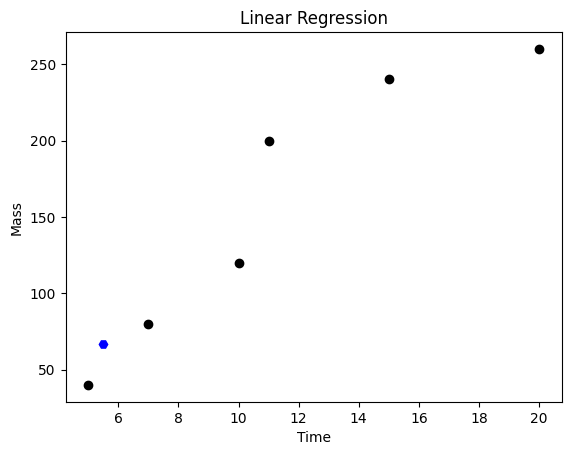

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[10],[11],[15],[20]]
m=[40,80,120,200,240,260]
LR.fit(t,m)
LR.predict([[5.5]])
plt.scatter(t,m,color='black')
#plot linear regression line
y_pred=LR.predict([[5.5]])
print(y_pred)
plt.plot(5.5,y_pred,color='blue',linewidth=3,marker="H")
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Linear Regression')
plt.show()


In [ ]:
#apple
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [ ]:
df=pd.read_csv("/content/apple.xlsx.csv")

In [ ]:
good_quality_apples=df[df['Quality']=='good']
bad_quality_apples=df[df['Quality']=='bad']

In [ ]:
good_quality_apples["class"]=0
bad_quality_apples["class"]=1

<ipython-input-30-12389accdbdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_quality_apples["class"]=0
<ipython-input-30-12389accdbdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_quality_apples["class"]=1


In [ ]:
good_quality_apples.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,class
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,0
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,0
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,0
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good,0


In [ ]:
bad_quality_apples.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,class
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad,1
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad,1
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad,1
10,10,-2.699336,-1.329507,-1.418507,-0.625546,2.371074,3.403165,-2.810808,bad,1


In [ ]:
good_quality_apples.shape,bad_quality_apples.shape

((2004, 10), (1996, 10))

In [ ]:
good_quality_apples_manual_testing = good_quality_apples.tail(10)
for i in range(1996,1996,-1):
    good_quality_apples.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

bad_quality_apples_manual_testing = bad_quality_apples.tail(10)
for i in range(1996,1996,-1):
    bad_quality_apples.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [ ]:
data_manual_testing = pd.concat([bad_quality_apples_manual_testing, good_quality_apples_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [ ]:
data_merge = pd.concat([bad_quality_apples,good_quality_apples],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,class
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad,1
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad,1
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad,1
10,10,-2.699336,-1.329507,-1.418507,-0.625546,2.371074,3.403165,-2.810808,bad,1
12,12,-0.170812,-1.867271,-1.771845,2.413155,-3.094555,-0.624884,-2.076114,bad,1
16,16,-1.468952,-1.950360,-2.214373,0.909759,2.864449,3.965956,-0.558209,bad,1
18,18,-0.302364,1.724396,-2.442337,3.465108,0.449792,-0.074362,2.493782,bad,1
20,20,-2.334590,-2.943709,-3.452628,0.762392,4.076462,6.346445,0.726776,bad,1
22,22,-2.423946,-0.698501,0.146030,0.630106,2.990561,0.779473,3.184188,bad,1


Weight
-7.149848    1
-6.581590    1
-6.556685    1
-6.428075    1
-6.235107    1
            ..
 4.369571    1
 4.738227    1
 5.014002    1
 5.149000    1
 5.790714    1
Name: Sweetness, Length: 4000, dtype: int64


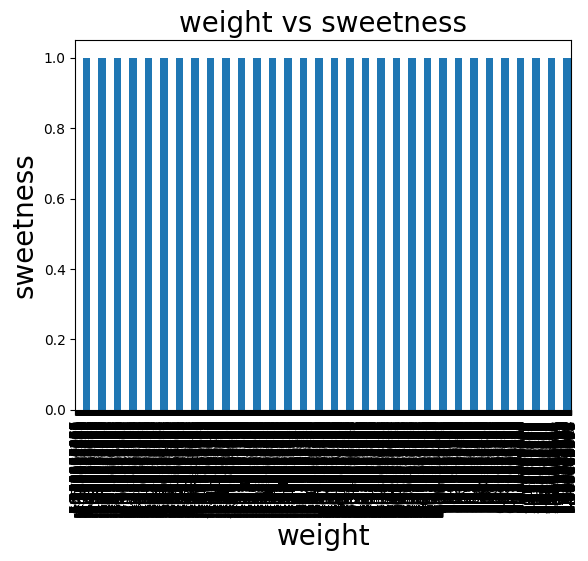

In [ ]:
print(data_merge.groupby(['Weight'])['Sweetness'].count())
data_merge.groupby(['Weight'])['Sweetness'].count().plot(kind="bar")
plt.title("weight vs sweetness",size=20)
plt.xlabel("weight",size=20)
plt.ylabel("sweetness",size=20)
plt.show()

class
0    2004
1    1996
Name: Sweetness, dtype: int64
0 = bad quality apples 
1 = good quality papples


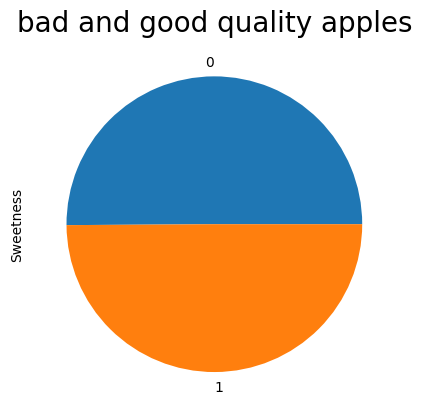

In [ ]:
print(data_merge.groupby(['class'])['Sweetness'].count())
print("0 = bad quality apples \n1 = good quality papples")
data_merge.groupby(['class'])['Sweetness'].count().plot(kind="pie")
plt.title("bad and good quality apples",size=20)
plt.show()

In [ ]:
data = data_merge.drop(["Size","Weight","Quality","Crunchiness","Juiciness","Ripeness","Acidity","Acidity"], axis=1)
data.head(10) #displaying remaining dataset

,A_id,Sweetness,class
2,2,-1.738429,1
5,5,-1.913511,1
8,8,0.986429,1
9,9,-4.092223,1
10,10,-1.418507,1
12,12,-1.771845,1
16,16,-2.214373,1
18,18,-2.442337,1
20,20,-3.452628,1
22,22,0.146030,1


In [ ]:
data=data.sample(frac=1)
data.head(10)

,A_id,Sweetness,class
1894,1894,0.947333,0
2341,2341,-1.804378,0
3555,3555,-1.156283,0
785,785,1.487351,0
3076,3076,2.057365,1
2246,2246,-0.621122,1
3576,3576,0.017102,1
97,97,-1.546919,0
1577,1577,-1.656860,0
2503,2503,-0.054683,1


In [ ]:
data.isnull().sum()

A_id         0
Sweetness    0
class        0
dtype: int64

In [ ]:
x=data["Sweetness"]
y=data["class"]

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
#Problem data
t=np.array([5,7,12,16,20]).reshape(-1,1)#Feature matrix(independent variable)
m=np.array([40,120,180,210,240])#Target vector (dependent variable)

In [ ]:
#Create a linear regression model
LR=LinearRegression()
#Fit the model to the data
LR.fit(t,m)

LinearRegression()

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


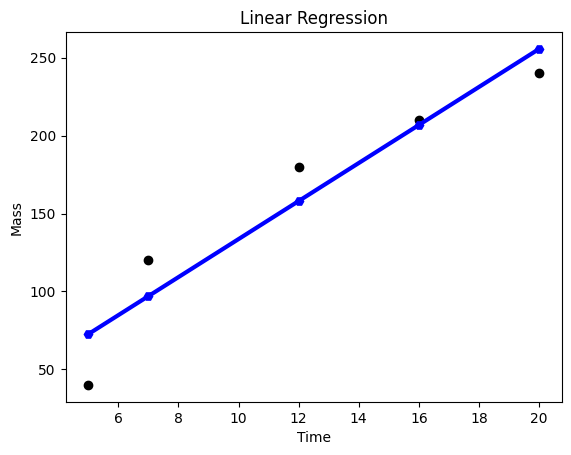

array([105.50649351])

In [ ]:
#plot the dat
plt.scatter(t,m,color='black')
#plot linear regression line
y_pred=LR.predict(t)#t=5,7,12,16,20
print(y_pred)
plt.plot(t,y_pred,color='blue',linewidth=3,marker="H")
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Linear Regression')
plt.show()
LR.predict([[7.7]])

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
#Distance and corresponding probability data
distances=np.array([1,2,5,10,15,20,21,22,23,24,25,26,27,28,29,30,35,40,41,47,50]).reshape(-1,1)
probabilities=np.array([1,1,1,1,1,1,0.9,0.85,0.73,0.67,0.5,0.47,0.39,0.31,0.25,0.15,0,0,0,0,0])
#convert probabilities to binary labels
threshold=0.
binary_labels=(probabilities>threshold)
#create and fit logistic regression model
logr=LogisticRegression()
logr.fit(distances, binary_labels)

LogisticRegression()

In [ ]:
p=logr.predict([[25]])#distance
print(p)

[ True]


In [ ]:
if p==[True]:
  print("Goal")
else:
  print("No Goal")

Goal


In [ ]:
#predict 100 distances between 1 and 50
#generate distances for prediction
dist=np.linspace(1,50,100).reshape(-1,1)
print(dist)#distances

#make predictions using the model
prob=logr.predict_proba(dist)#probabilities-predict:
print(prob)

[[ 1.        ]
 [ 1.49494949]
 [ 1.98989899]
 [ 2.48484848]
 [ 2.97979798]
 [ 3.47474747]
 [ 3.96969697]
 [ 4.46464646]
 [ 4.95959596]
 [ 5.45454545]
 [ 5.94949495]
 [ 6.44444444]
 [ 6.93939394]
 [ 7.43434343]
 [ 7.92929293]
 [ 8.42424242]
 [ 8.91919192]
 [ 9.41414141]
 [ 9.90909091]
 [10.4040404 ]
 [10.8989899 ]
 [11.39393939]
 [11.88888889]
 [12.38383838]
 [12.87878788]
 [13.37373737]
 [13.86868687]
 [14.36363636]
 [14.85858586]
 [15.35353535]
 [15.84848485]
 [16.34343434]
 [16.83838384]
 [17.33333333]
 [17.82828283]
 [18.32323232]
 [18.81818182]
 [19.31313131]
 [19.80808081]
 [20.3030303 ]
 [20.7979798 ]
 [21.29292929]
 [21.78787879]
 [22.28282828]
 [22.77777778]
 [23.27272727]
 [23.76767677]
 [24.26262626]
 [24.75757576]
 [25.25252525]
 [25.74747475]
 [26.24242424]
 [26.73737374]
 [27.23232323]
 [27.72727273]
 [28.22222222]
 [28.71717172]
 [29.21212121]
 [29.70707071]
 [30.2020202 ]
 [30.6969697 ]
 [31.19191919]
 [31.68686869]
 [32.18181818]
 [32.67676768]
 [33.17171717]
 [33.66666

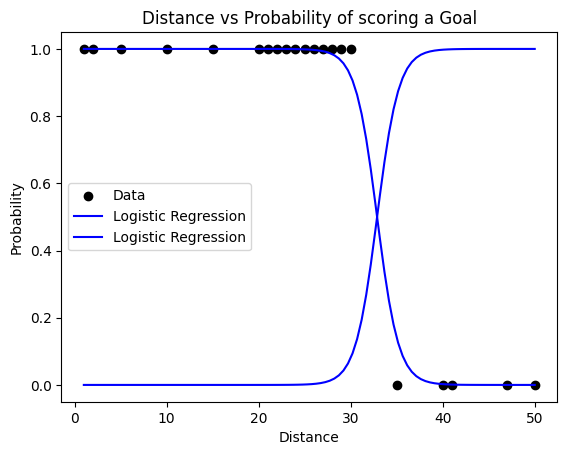

In [ ]:
#plotting actual data-train
import matplotlib.pyplot as plt
plt.scatter(distances,binary_labels,color='black',label='Data')
#plotting test data with predictions - valid/test
plt.plot(dist,prob,color='blue',label='Logistic Regression')
plt.title('Distance vs Probability of scoring a Goal')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv("/demoDT.csv",sep=",")

In [ ]:
df

,State,Literacy,Cleanliness,Crime_Rate,good
0,A,92,90,54,0
1,B,56,67,50,1
2,C,78,80,62,0
3,D,85,75,48,1
4,E,60,82,55,0
5,F,72,78,60,0
6,G,88,85,45,0
7,H,64,70,58,1
8,I,90,88,42,0
9,J,68,72,65,1


In [ ]:
import numpy as np
#load variables as array!
cr=np.array(df[' Crime_Rate']).reshape(-1,1)
y=np.array(df[ 'good'])

In [ ]:
#create the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#train the model
model.fit(cr,y)

LogisticRegression()

In [ ]:
c=int(input("Enter crime rate in your city:"))
pred=model.predict([[c]]) #crime rate
if pred ==1:
  print("Good city")
else:
  print("Bad city")

Enter crime rate in your city:50
Bad city
